In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [5]:

# Load dataset
df = pd.read_csv("/content/credit_score_dataset 3.csv")


In [6]:
# Display basic info
print(df.head())
print(df.describe())


   Age  Income   Debt  Credit_History_Length  Missed_Payments  Loan_Amount  \
0   56  136748  14025                     12                3        10520   
1   46   25287  37124                      5                0        49278   
2   32  146593  15288                      3                5        41455   
3   60   54387  24650                      1                3        25929   
4   25   28512   7540                      4                4        46605   

   Credit_Score  
0           324  
1           633  
2           654  
3           415  
4           347  
               Age         Income          Debt  Credit_History_Length  \
count  1000.000000    1000.000000   1000.000000            1000.000000   
mean     40.986000   85197.154000  26482.732000              15.187000   
std      13.497852   38105.636581  13833.908263               8.479265   
min      18.000000   20060.000000   1105.000000               1.000000   
25%      29.000000   52237.250000  14152.500000      

In [7]:
# Check for missing values
print(df.isnull().sum())


Age                      0
Income                   0
Debt                     0
Credit_History_Length    0
Missed_Payments          0
Loan_Amount              0
Credit_Score             0
dtype: int64


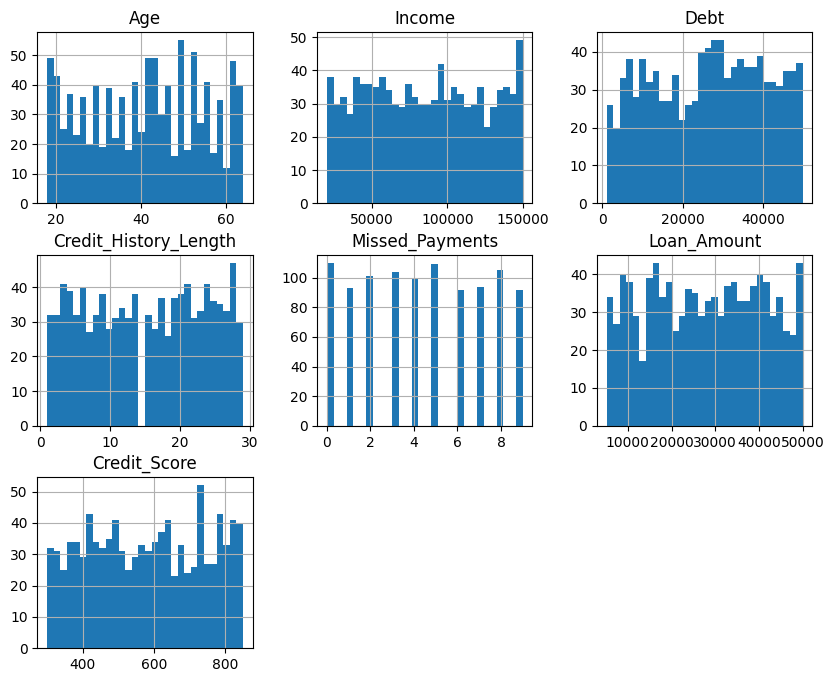

In [8]:
# Visualizing distributions
df.hist(figsize=(10, 8), bins=30)
plt.show()


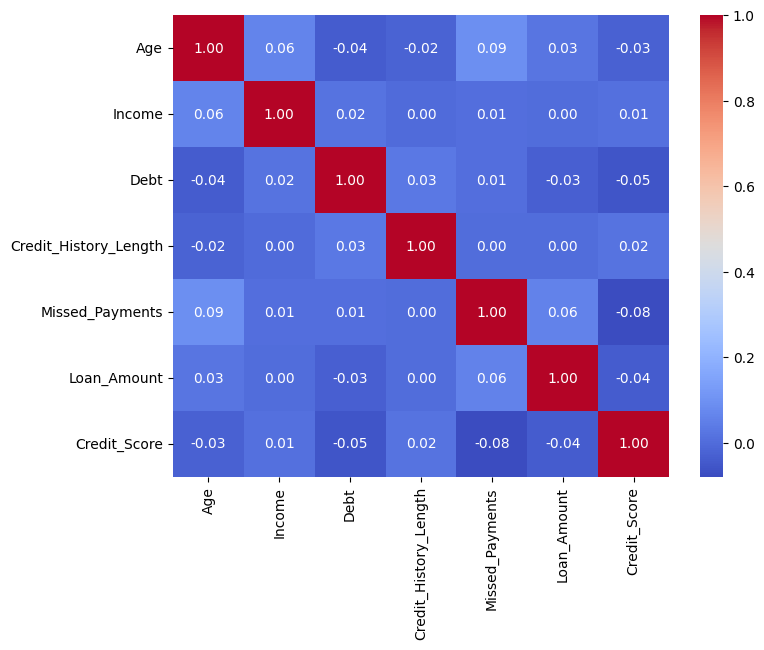

In [9]:

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [17]:
# Define features and target
X = df.drop(columns=["Credit_Score"])  # Features
y = df["Credit_Score"]  # Target



Mean Absolute Error: 141.74
Mean Squared Error: 27655.63
R² Score: -0.06


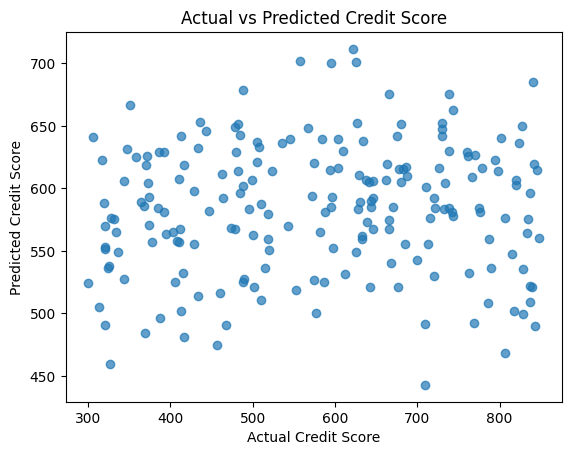

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Actual vs Predicted Plot
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual vs Predicted Credit Score")
plt.show()